In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut
%matplotlib notebook
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from IPython.display import clear_output
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow import feature_column

In [2]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [3]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
#!pip install imblearn

In [6]:
import imblearn
from collections import Counter

In [7]:
data_clean = pd.read_csv('Date_clean.csv')

In [8]:
data_clean.head()

,hospital_id,hospital_death,age,elective_surgery,hospital_admit_source,icu_admit_source,icu_id,icu_type,apache_2_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_unable_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem
0,22,0,68.0,0,5,2,286,3,113.0,0,0.0,31.0,2.51,0.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,46.0,32.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,86.0,85.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
1,185,0,77.0,0,5,2,274,6,108.0,0,0.0,9.0,0.56,0.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,85.0,57.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
2,187,0,67.0,0,3,1,293,6,301.0,0,0.0,13.0,0.71,0.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
3,187,0,59.0,0,9,1,293,6,108.0,0,0.0,18.0,0.78,0.0,197.0,133.0,33.5,1.0,138.0,53.0,135.0,35.0,1.0,5.9,107.0,65.0,76.0,68.0,112.0,70.0,138.0,84.0,117.0,97.0,38.0,16.0,100.0,87.0,191.0,116.0,151.0,133.0,37.2,35.0,107.0,79.0,107.0,79.0,79.0,72.0,138.0,117.0,117.0,117.0,18.0,18.0,100.0,100.0,191.0,163.0,191.0,163.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
4,132,0,70.0,0,4,1,282,6,113.0,0,0.0,48.0,2.05,0.0,164.0,120.0,22.6,0.0,60.0,28.0,140.0,36.6,1.0,12.8,84.0,46.0,84.0,46.0,118.0,86.0,114.0,60.0,114.0,60.0,28.0,12.0,100.0,92.0,147.0,71.0,147.0,71.0,38.5,36.6,74.0,55.0,74.0,55.0,118.0,114.0,88.0,88.0,60.0,60.0,28.0,26.0,96.0,92.0,119.0,106.0,119.0,106.0,0.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10


# MLP

In [9]:
X_ANN = data_clean.drop('hospital_death', axis=1)
y_ANN = data_clean['hospital_death']

In [10]:
y_ANN.value_counts()

0    44425
1     4452
Name: hospital_death, dtype: int64

In [11]:
# from imblearn.over_sampling import RandomOverSampler 
# ROS = RandomOverSampler()

# print('Original dataset shape %s' % Counter(y_ANN))

# X_res, y_res = ROS.fit_resample(X_ANN, y_ANN)

# print('After undersample dataset shape %s' % Counter(y_res))

In [12]:
from imblearn.combine import SMOTEENN 
SMOTEENN = SMOTEENN()

print('Original dataset shape %s' % Counter(y_ANN))

X_res, y_res = SMOTEENN.fit_resample(X_ANN, y_ANN)

print('After undersample dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 44425, 1: 4452})
After undersample dataset shape Counter({1: 44361, 0: 28444})


In [13]:
X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_ANN = scaler.fit_transform(X_train_ANN)
X_test_ANN = scaler.transform(X_test_ANN)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(1500, activation='relu', input_shape=(71,)),
    keras.layers.Dense(900, activation='elu'),
    keras.layers.Dense(850, activation='elu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [18]:
history = model.fit(X_train_ANN, y_train_ANN, epochs=50, batch_size=50, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
816/816 [==============================] - 18s 20ms/step - loss: 0.3299 - accuracy: 0.8602 - val_loss: 0.2703 - val_accuracy: 0.8871
Epoch 2/50
816/816 [==============================] - 16s 19ms/step - loss: 0.2454 - accuracy: 0.9014 - val_loss: 0.2442 - val_accuracy: 0.9037
Epoch 3/50
816/816 [==============================] - 17s 21ms/step - loss: 0.2057 - accuracy: 0.9190 - val_loss: 0.2152 - val_accuracy: 0.9145
Epoch 4/50
816/816 [==============================] - 18s 22ms/step - loss: 0.1783 - accuracy: 0.9296 - val_loss: 0.1889 - val_accuracy: 0.9253
Epoch 5/50
816/816 [==============================] - 20s 25ms/step - loss: 0.1590 - accuracy: 0.9378 - val_loss: 0.1900 - val_accuracy: 0.9256
Epoch 6/50
816/816 [==============================] - 16s 20ms/step - loss: 0.1374 - accuracy: 0.9466 - val_loss: 0.1683 - val_accuracy: 0.9322
Epoch 7/50
816/816 [==============================] - 18s 22ms/step - loss: 0.1264 - accuracy: 0.9517 - val_loss: 0.1800 - val_accuracy:

In [19]:
test_loss, test_acc = model.evaluate(X_test_ANN, y_test_ANN)
print('Test accuracy:', test_acc)

683/683 [==============================] - 4s 6ms/step - loss: 0.1559 - accuracy: 0.9522
Test accuracy: 0.9522022008895874


In [20]:
# Predict probabilities for the test set
y_pred_prob_ANN = model.predict(X_test_ANN)
    
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_ANN, y_pred_prob_ANN)
    
# Compute the AUROC score
roc_auc = roc_auc_score(y_test_ANN, y_pred_prob_ANN)
    

683/683 [==============================] - 3s 5ms/step


<IPython.core.display.Javascript object>


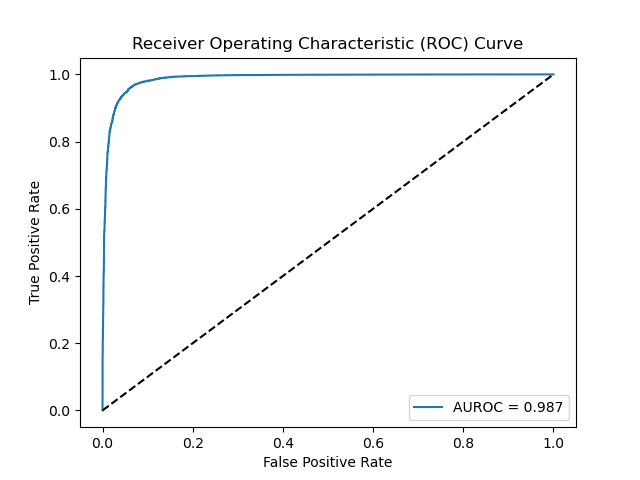

In [21]:
   
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUROC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

683/683 [==============================] - 4s 5ms/step


<IPython.core.display.Javascript object>


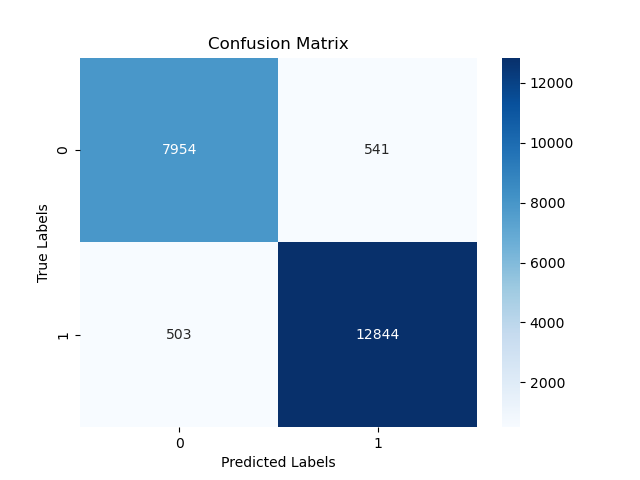

In [22]:
from sklearn.metrics import confusion_matrix
# Predict classes for the test set
y_pred_prob_ANN = model.predict(X_test_ANN)

# Round the probabilities to obtain the predicted class labels
y_pred_ANN = y_pred_prob_ANN.round().astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_test_ANN, y_pred_ANN)

# Plot the confusion matrix using a heatmap
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
observed_deaths = cm[1, 1]  # True positives
expected_deaths = y_test_ANN.sum()  # Sum of true positives and false negatives
smr = observed_deaths / expected_deaths
print('Standardized Mortality Ratio (SMR):', smr)

Standardized Mortality Ratio (SMR): 0.962313628530756


In [24]:

# # Convert y_test_ANN numpy array to a pandas Series
# y_test_ANN_series = pd.Series(y_test_ANN, name='True_Label')

# # Save the true labels to a file
# output_file = 'true_labels_output.csv'
# y_test_ANN_series.to_csv(output_file, index=False)

In [25]:
# data_y_pred = pd.read_csv('true_labels_output.csv')

In [26]:
# data_y_pred.value_counts()

In [27]:
# data_y_pred.head()

In [28]:
# Calculate the variance of predicted probabilities
variance = np.var(y_pred_prob_ANN)

# Print the variance
print("Variance of predicted probabilities:", variance)

Variance of predicted probabilities: 0.21887188


<IPython.core.display.Javascript object>


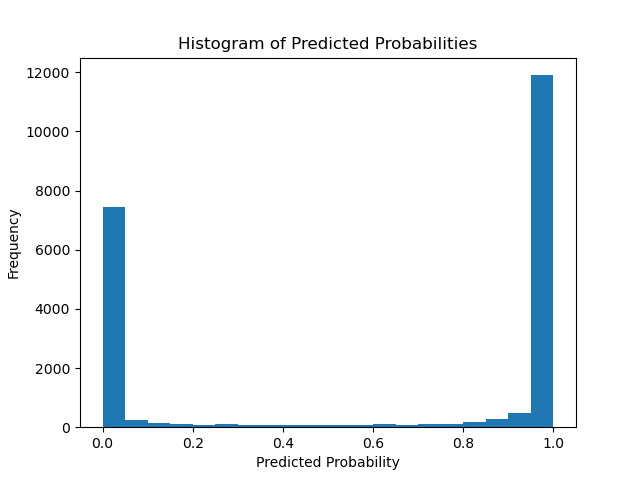

In [29]:
# Plot a histogram of the predicted probabilities
plt.figure()
plt.hist(y_pred_prob_ANN, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

# DEPLOY

In [69]:
data_test_clean = pd.read_csv('Date_test_clean.csv')

In [70]:

# Load the "data_test_clean" dataset
X_test_clean = data_test_clean  # Assuming "data_test_clean" doesn't have the 'hospital_death' column

# Standardize the preprocessed "data_test_clean" dataset using the same scaler used for training data
X_test_clean_scaled = scaler.fit_transform(X_test_clean)




In [72]:
# Make predictions on the standardized "data_test_clean" dataset
y_pred_prob_ANN = model.predict(X_test_clean_scaled)

# Retrieve the prediction and confidence for one patient (e.g., patient at index 0)
# Select the indices of the patients you want to include
selected_patient_indices = [0, 10, 150, 230, 500]  # Example indices

# Iterate over the selected patient indices and print the individual prediction and confidence for each patient
for patient_index in selected_patient_indices:
    individual_prediction = int(round(y_pred_prob_ANN[patient_index][0]))
    individual_confidence = np.abs(y_pred_prob_ANN[patient_index][0] - 0.5)  # Assuming the prediction is between 0 and 1

    print(f"Patient Index: {patient_index} - Prediction: {individual_prediction} - Confidence: {individual_confidence}")

617/617 [==============================] - 3s 5ms/step
Patient Index: 0 - Prediction: 0 - Confidence: 0.34842370450496674
Patient Index: 10 - Prediction: 1 - Confidence: 0.4993247389793396
Patient Index: 150 - Prediction: 0 - Confidence: 0.4991156570613384
Patient Index: 230 - Prediction: 0 - Confidence: 0.49999310845987566
Patient Index: 500 - Prediction: 0 - Confidence: 0.4933876181021333


# Electro MLP

In [30]:
electro_data_clean=data_clean.drop([
'bun_apache','creatinine_apache','hematocrit_apache','sodium_apache',
'wbc_apache',                                           
'apache_4a_icu_death_prob'], axis=1)

In [31]:
electro_data_clean.head()

,hospital_id,hospital_death,age,elective_surgery,hospital_admit_source,icu_admit_source,icu_id,icu_type,apache_2_diagnosis,apache_post_operative,arf_apache,gcs_unable_apache,glucose_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem
0,22,0,68.0,0,5,2,286,3,113.0,0,0.0,0.0,168.0,118.0,0.0,40.0,36.0,39.3,0.0,46.0,32.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,86.0,85.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
1,185,0,77.0,0,5,2,274,6,108.0,0,0.0,0.0,145.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,85.0,57.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
2,187,0,67.0,0,3,1,293,6,301.0,0,0.0,0.0,156.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
3,187,0,59.0,0,9,1,293,6,108.0,0,0.0,0.0,197.0,133.0,1.0,138.0,53.0,35.0,1.0,107.0,65.0,76.0,68.0,112.0,70.0,138.0,84.0,117.0,97.0,38.0,16.0,100.0,87.0,191.0,116.0,151.0,133.0,37.2,35.0,107.0,79.0,107.0,79.0,79.0,72.0,138.0,117.0,117.0,117.0,18.0,18.0,100.0,100.0,191.0,163.0,191.0,163.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
4,132,0,70.0,0,4,1,282,6,113.0,0,0.0,0.0,164.0,120.0,0.0,60.0,28.0,36.6,1.0,84.0,46.0,84.0,46.0,118.0,86.0,114.0,60.0,114.0,60.0,28.0,12.0,100.0,92.0,147.0,71.0,147.0,71.0,38.5,36.6,74.0,55.0,74.0,55.0,118.0,114.0,88.0,88.0,60.0,60.0,28.0,26.0,96.0,92.0,119.0,106.0,119.0,106.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10


In [32]:
output_file = 'electro_data_clean.csv'
electro_data_clean.to_csv(output_file, index=False)

In [33]:
X_ANN_electro = electro_data_clean.drop('hospital_death', axis=1)
y_ANN_electro = electro_data_clean['hospital_death']

In [34]:
from imblearn.combine import SMOTEENN 
SMOTEENN = SMOTEENN()

print('Original dataset shape %s' % Counter(y_ANN_electro))

electro_X_res, electro_y_res = SMOTEENN.fit_resample(X_ANN_electro, y_ANN_electro)

print('After undersample dataset shape %s' % Counter(electro_y_res))

Original dataset shape Counter({0: 44425, 1: 4452})
After undersample dataset shape Counter({1: 44327, 0: 28338})


In [35]:
electro_X_train_ANN, electro_X_test_ANN, electro_y_train_ANN, electro_y_test_ANN = train_test_split(electro_X_res, electro_y_res, test_size=0.3, random_state=42)

In [36]:
electro_X_train_ANN = scaler.fit_transform(electro_X_train_ANN)
electro_X_test_ANN = scaler.transform(electro_X_test_ANN)

In [37]:
electro_model = keras.Sequential([
    keras.layers.Dense(1500, activation='relu', input_shape=(65,)),
    keras.layers.Dense(900, activation='elu'),
    keras.layers.Dense(850, activation='elu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
electro_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = electro_model.fit(electro_X_train_ANN, electro_y_train_ANN, epochs=50, batch_size=50, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
814/814 [==============================] - 18s 21ms/step - loss: 0.3553 - accuracy: 0.8481 - val_loss: 0.3067 - val_accuracy: 0.8747
Epoch 2/50
814/814 [==============================] - 20s 25ms/step - loss: 0.2775 - accuracy: 0.8826 - val_loss: 0.2805 - val_accuracy: 0.8815
Epoch 3/50
814/814 [==============================] - 21s 26ms/step - loss: 0.2439 - accuracy: 0.8977 - val_loss: 0.2547 - val_accuracy: 0.8954
Epoch 4/50
814/814 [==============================] - 18s 23ms/step - loss: 0.2108 - accuracy: 0.9129 - val_loss: 0.3192 - val_accuracy: 0.8597
Epoch 5/50
814/814 [==============================] - 18s 22ms/step - loss: 0.1989 - accuracy: 0.9172 - val_loss: 0.2183 - val_accuracy: 0.9103
Epoch 6/50
814/814 [==============================] - 19s 24ms/step - loss: 0.1726 - accuracy: 0.9288 - val_loss: 0.1979 - val_accuracy: 0.9225
Epoch 7/50
814/814 [==============================] - 20s 25ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.2052 - val_accuracy:

In [40]:
test_loss, test_acc = electro_model.evaluate(electro_X_test_ANN, electro_y_test_ANN)
print('Test accuracy:', test_acc)

682/682 [==============================] - 4s 5ms/step - loss: 0.1893 - accuracy: 0.9273
Test accuracy: 0.9273394346237183


In [41]:
# Predict probabilities for the test set
electro_y_pred_prob_ANN = electro_model.predict(electro_X_test_ANN)
    
# Compute the false positive rate, true positive rate, and thresholds
electro_fpr, electro_tpr, electro_thresholds = roc_curve(electro_y_test_ANN, electro_y_pred_prob_ANN)
    
# Compute the AUROC score
electro_roc_auc = roc_auc_score(electro_y_test_ANN, electro_y_pred_prob_ANN)
    

682/682 [==============================] - 3s 5ms/step


<IPython.core.display.Javascript object>


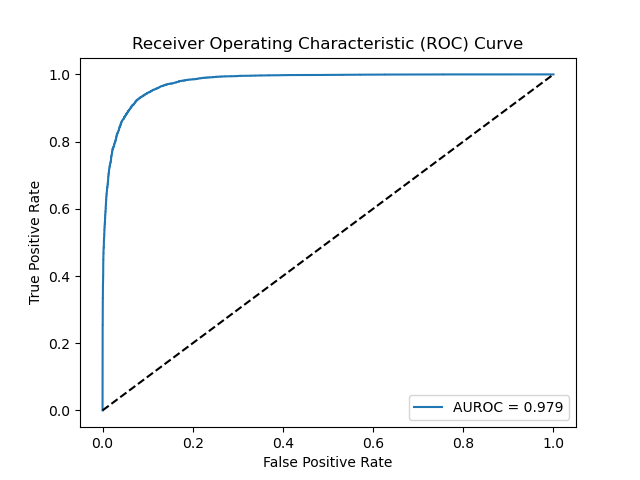

In [47]:
   
# Plot the ROC curve
plt.figure()
plt.plot(electro_fpr, electro_tpr, label='AUROC = %0.3f' % electro_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

682/682 [==============================] - 3s 5ms/step


<IPython.core.display.Javascript object>


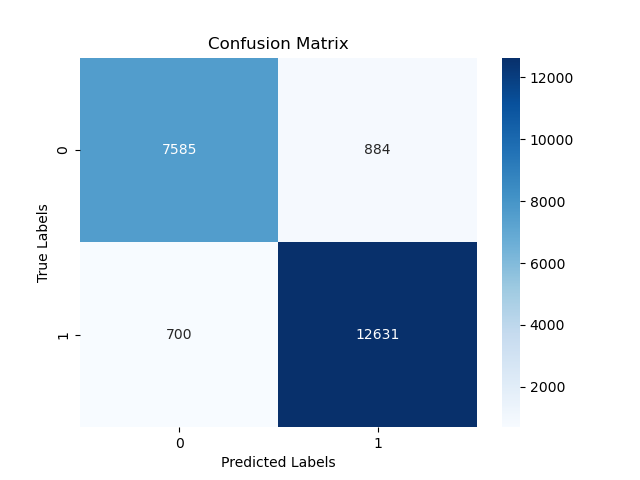

In [48]:
# Predict classes for the test set
electro_y_pred_prob_ANN = electro_model.predict(electro_X_test_ANN)

# Round the probabilities to obtain the predicted class labels
electro_y_pred_ANN = electro_y_pred_prob_ANN.round().astype(int)

# Create a confusion matrix
electro_cm = confusion_matrix(electro_y_test_ANN, electro_y_pred_ANN)

# Plot the confusion matrix using a heatmap
plt.figure()
sns.heatmap(electro_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
electro_observed_deaths = electro_cm[1, 1]  # True positives
electro_expected_deaths = electro_y_test_ANN.sum()  # Sum of true positives and false negatives
electro_smr = electro_observed_deaths / electro_expected_deaths
print('Standardized Mortality Ratio (SMR):', electro_smr)

Standardized Mortality Ratio (SMR): 0.9474908108919061


In [45]:
# Calculate the variance of predicted probabilities
electro_variance = np.var(electro_y_pred_prob_ANN)

# Print the variance
print("Variance of predicted probabilities:", electro_variance)

Variance of predicted probabilities: 0.20082842


<IPython.core.display.Javascript object>


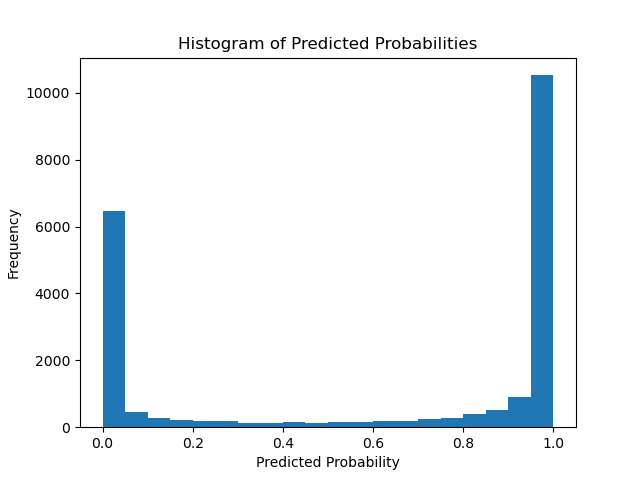

In [50]:
# Plot a histogram of the predicted probabilities
plt.figure()
plt.hist(electro_y_pred_prob_ANN, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

# DEPLOY

In [73]:
electro_data_test_clean = pd.read_csv('electro_Date_test_clean.csv')

In [74]:
# Load the "data_test_clean" dataset
electro_X_test_clean = electro_data_test_clean  # Assuming "data_test_clean" doesn't have the 'hospital_death' column

# Standardize the preprocessed "data_test_clean" dataset using the same scaler used for training data
electro_X_test_clean_scaled = scaler.fit_transform(electro_X_test_clean)



In [76]:
# Make predictions on the standardized "data_test_clean" dataset
electro_y_pred_prob_ANN = electro_model.predict(electro_X_test_clean_scaled)

electro_selected_patient_indices = [0, 10, 150, 230, 500]  # Example indices

# Iterate over the selected patient indices and print the individual prediction and confidence for each patient
for patient_index in electro_selected_patient_indices:
    electro_individual_prediction = int(round(electro_y_pred_prob_ANN[patient_index][0]))
    electro_individual_confidence = np.abs(electro_y_pred_prob_ANN[patient_index][0] - 0.5)  # Assuming the prediction is between 0 and 1

    print(f"Patient Index: {patient_index} - Prediction: {electro_individual_prediction} - Confidence: {electro_individual_confidence}")

617/617 [==============================] - 3s 5ms/step
Patient Index: 0 - Prediction: 0 - Confidence: 0.10731622576713562
Patient Index: 10 - Prediction: 1 - Confidence: 0.4994514584541321
Patient Index: 150 - Prediction: 0 - Confidence: 0.19229960441589355
Patient Index: 230 - Prediction: 0 - Confidence: 0.4983331789262593
Patient Index: 500 - Prediction: 0 - Confidence: 0.4940086589194834
